In [6]:
#Deskripsi Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Memanggil data set
df = pd.read_csv("vw.csv")

In [7]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


<Axes: >

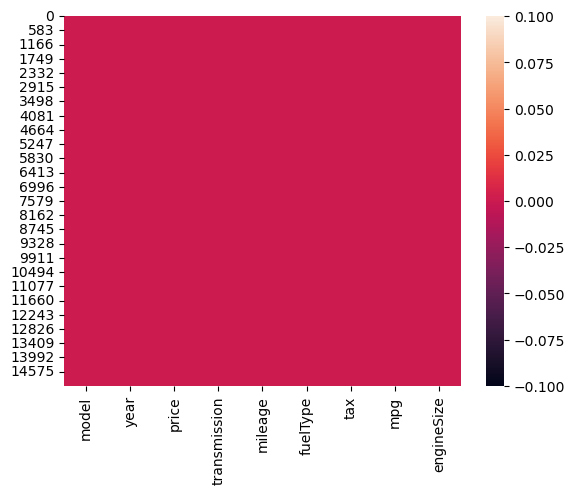

In [9]:
sns.heatmap(df.isnull())

In [30]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: ' T-Roc'

<Figure size 1000x800 with 0 Axes>

In [12]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' Caddy Maxi'),
  Text(1, 0, ' Fox'),
  Text(2, 0, ' Caddy'),
  Text(3, 0, ' Eos'),
  Text(4, 0, ' Caddy Life'),
  Text(5, 0, ' California'),
  Text(6, 0, ' Jetta'),
  Text(7, 0, ' Caddy Maxi Life'),
  Text(8, 0, ' Shuttle'),
  Text(9, 0, ' Beetle'),
  Text(10, 0, ' Tiguan Allspace'),
  Text(11, 0, ' CC'),
  Text(12, 0, ' Caravelle'),
  Text(13, 0, ' Amarok'),
  Text(14, 0, ' Scirocco'),
  Text(15, 0, ' Arteon'),
  Text(16, 0, ' Sharan'),
  Text(17, 0, ' Golf SV'),
  Text(18, 0, ' T-Cross'),
  Text(19, 0, ' Touran'),
  Text(20, 0, ' Touareg'),
  Text(21, 0, ' T-Roc'),
  Text(22, 0, ' Up'),
  Text(23, 0, ' Passat'),
  Text(24, 0, ' Tiguan'),
  Text(25, 0, ' Polo'),
  Text(26, 0, ' Golf')])

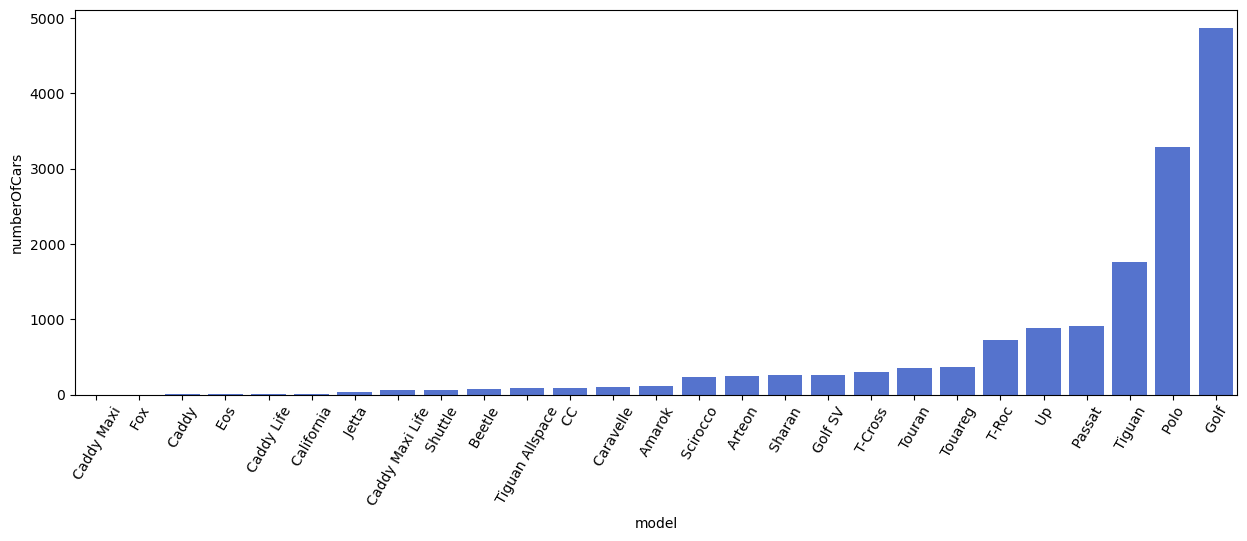

In [13]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

In [14]:
# Ukuran Mesin
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

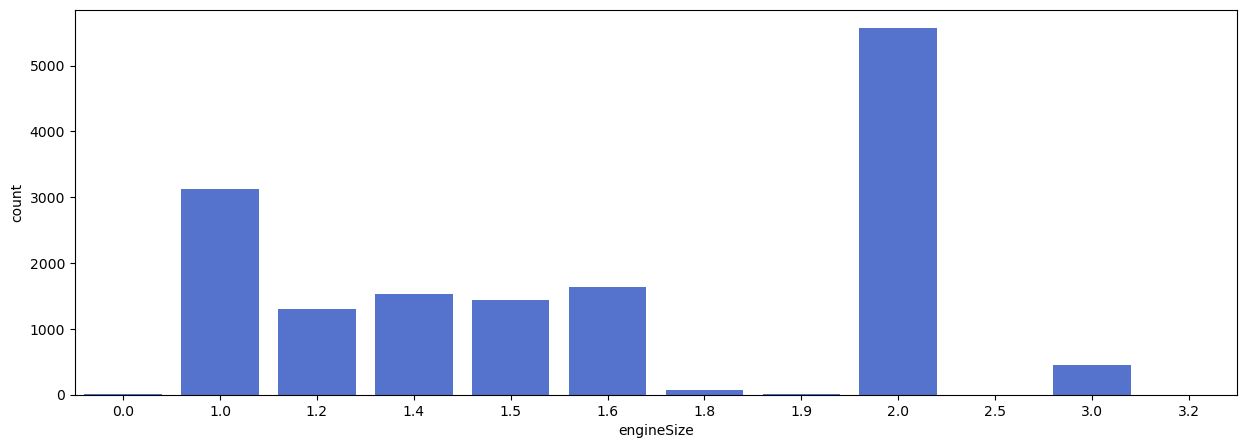

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')


C:\Users\DELL\AppData\Local\Temp\ipykernel_2052\1861589590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

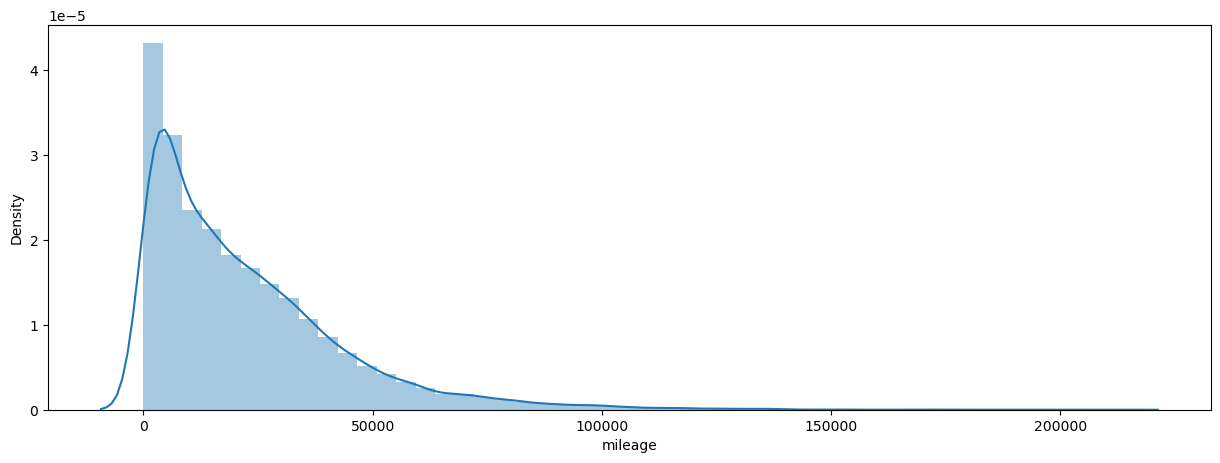

In [16]:
# Ditribusi Mileage

plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2052\3393920548.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

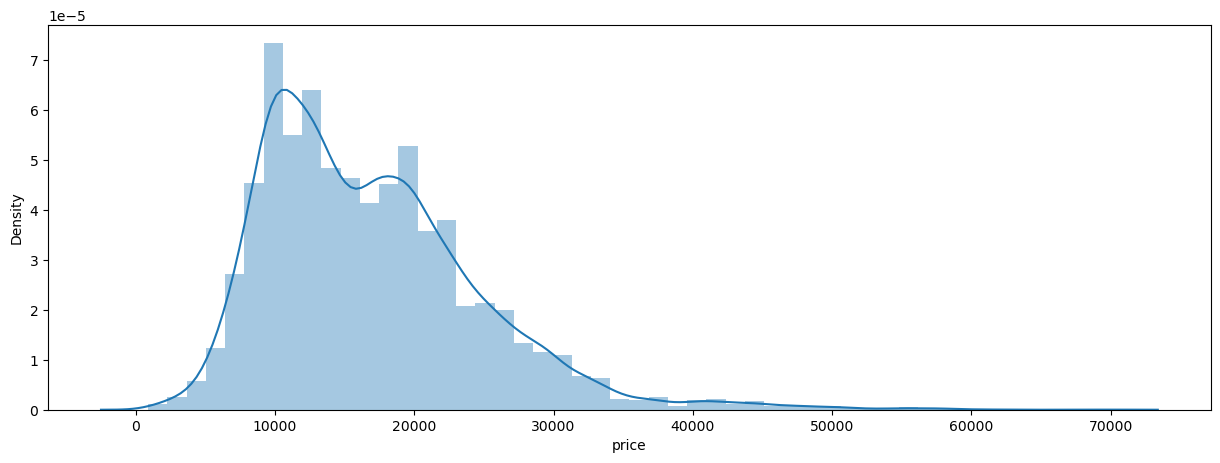

In [17]:
# Ditribusi Harga Mobil

plt.figure(figsize=(15,5))
sns.distplot(df['price'])

In [18]:
# Seleksi FItur
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((15157, 5), (15157,))

In [19]:
#Split Data Training dan Data Testing
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(3790,)

In [20]:
# Membuat Model Regresi Linear

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [24]:
score = lr.score(X_test, y_test)
print("Akurasi Model Regresi Liner adalah" , score)

Akurasi Model Regresi Liner adalah 0.759199432287557


In [22]:
#Membuat Inputan Model Regresi Linear
# Year=2019 mileage=5000 tax=145 mpg=30.2 engineSize=2
input_data = np.array([[2019, 5000, 145, 30.2, 2]])

prediction = lr.predict(input_data)
print("Estimasi Harga Mobil Dalam EUR adalah", prediction)

Estimasi Harga Mobil Dalam EUR adalah [26540.22730269]


e:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Save Model

import pickle
filename ='estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))